# Telecom X 2 - Predicción de Cancelación de Clientes

### Carga y comprensión de los datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [ ]:
df = pd.read_csv('/content/telecom_limpio.csv')

In [ ]:
df.head()

,ID_cliente,Cancelacion,Genero,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Tipo_internet,...,Proteccion_dispositivo,Soporte_tecnico,TV_streaming,Peliculas_streaming,Tipo_contrato,Facturacion_sin_papel,Metodo_pago,Cargos_mensuales,Cargos_totales,Costo_diario
0,0002-ORFBO,0,Female,0,1,1,9,1,0.0,DSL,...,0.0,1.0,1.0,0.0,Anual,1,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0,Male,0,0,0,9,1,1.0,DSL,...,0.0,0.0,0.0,1.0,Mensual,0,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1,Male,0,0,0,4,1,0.0,Fiber optic,...,1.0,0.0,0.0,0.0,Mensual,1,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1,Male,1,1,0,13,1,0.0,Fiber optic,...,1.0,0.0,1.0,1.0,Mensual,1,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1,Female,1,1,0,3,1,0.0,Fiber optic,...,0.0,1.0,1.0,0.0,Mensual,1,Mailed check,83.9,267.40,2.796667


In [ ]:
df.shape

(7032, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_cliente              7032 non-null   object 
 1   Cancelacion             7032 non-null   int64  
 2   Genero                  7032 non-null   object 
 3   Ciudadano_mayor         7032 non-null   int64  
 4   Tiene_pareja            7032 non-null   int64  
 5   Tiene_dependientes      7032 non-null   int64  
 6   Antiguedad_meses        7032 non-null   int64  
 7   Servicio_telefonico     7032 non-null   int64  
 8   Multiples_lineas        6352 non-null   float64
 9   Tipo_internet           7032 non-null   object 
 10  Seguridad_en_linea      5512 non-null   float64
 11  Copia_seguridad         5512 non-null   float64
 12  Proteccion_dispositivo  5512 non-null   float64
 13  Soporte_tecnico         5512 non-null   float64
 14  TV_streaming            5512 non-null   

# 🔧 Preparación de los datos para modelado

### Eliminación de columnas irrelevantes

In [ ]:
df = df.drop(columns=["ID_cliente"])

In [ ]:
df.columns

Index(['Cancelacion', 'Genero', 'Ciudadano_mayor', 'Tiene_pareja',
       'Tiene_dependientes', 'Antiguedad_meses', 'Servicio_telefonico',
       'Multiples_lineas', 'Tipo_internet', 'Seguridad_en_linea',
       'Copia_seguridad', 'Proteccion_dispositivo', 'Soporte_tecnico',
       'TV_streaming', 'Peliculas_streaming', 'Tipo_contrato',
       'Facturacion_sin_papel', 'Metodo_pago', 'Cargos_mensuales',
       'Cargos_totales', 'Costo_diario'],
      dtype='object')

### Encoding

In [ ]:
categoricas = df.select_dtypes(include=["object"]).columns
categoricas

Index(['Genero', 'Tipo_internet', 'Tipo_contrato', 'Metodo_pago'], dtype='object')

In [ ]:
df = pd.get_dummies(df, columns=categoricas, drop_first=True)

In [ ]:
df.head()

,Cancelacion,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Seguridad_en_linea,Copia_seguridad,Proteccion_dispositivo,...,Cargos_totales,Costo_diario,Genero_Male,Tipo_internet_Fiber optic,Tipo_internet_No,Tipo_contrato_Bianual,Tipo_contrato_Mensual,Metodo_pago_Credit card (automatic),Metodo_pago_Electronic check,Metodo_pago_Mailed check
0,0,0,1,1,9,1,0.0,0.0,1.0,0.0,...,593.30,2.186667,False,False,False,False,False,False,False,True
1,0,0,0,0,9,1,1.0,0.0,0.0,0.0,...,542.40,1.996667,True,False,False,False,True,False,False,True
2,1,0,0,0,4,1,0.0,0.0,0.0,1.0,...,280.85,2.463333,True,True,False,False,True,False,True,False
3,1,1,1,0,13,1,0.0,0.0,1.0,1.0,...,1237.85,3.266667,True,True,False,False,True,False,True,False
4,1,1,1,0,3,1,0.0,0.0,0.0,0.0,...,267.40,2.796667,False,True,False,False,True,False,False,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Cancelacion                          7032 non-null   int64  
 1   Ciudadano_mayor                      7032 non-null   int64  
 2   Tiene_pareja                         7032 non-null   int64  
 3   Tiene_dependientes                   7032 non-null   int64  
 4   Antiguedad_meses                     7032 non-null   int64  
 5   Servicio_telefonico                  7032 non-null   int64  
 6   Multiples_lineas                     6352 non-null   float64
 7   Seguridad_en_linea                   5512 non-null   float64
 8   Copia_seguridad                      5512 non-null   float64
 9   Proteccion_dispositivo               5512 non-null   float64
 10  Soporte_tecnico                      5512 non-null   float64
 11  TV_streaming                  

In [ ]:
df["Cancelacion"].value_counts(normalize=True)

,proportion
Cancelacion,
0,0.734215
1,0.265785


# 📊 Análisis de Correlación

In [ ]:
corr_matrix = df.corr()
corr_matrix


,Cancelacion,Ciudadano_mayor,Tiene_pareja,Tiene_dependientes,Antiguedad_meses,Servicio_telefonico,Multiples_lineas,Seguridad_en_linea,Copia_seguridad,Proteccion_dispositivo,...,Cargos_totales,Costo_diario,Genero_Male,Tipo_internet_Fiber optic,Tipo_internet_No,Tipo_contrato_Bianual,Tipo_contrato_Mensual,Metodo_pago_Credit card (automatic),Metodo_pago_Electronic check,Metodo_pago_Mailed check
Cancelacion,1.000000,0.150541,-0.149982,-0.163128,-0.354049,0.011691,0.040207,-0.280508,-0.195758,-0.176806,...,-0.199484,0.192858,-0.008545,0.307463,-0.227578,-0.301552,0.404565,-0.134687,0.301455,-0.090773
Ciudadano_mayor,0.150541,1.000000,0.016957,-0.210550,0.015683,0.008392,0.153747,-0.110155,-0.003253,-0.011162,...,0.102411,0.219874,-0.001819,0.254923,-0.182519,-0.116205,0.137752,-0.024359,0.171322,-0.152987
Tiene_pareja,-0.149982,0.016957,1.000000,0.452269,0.381912,0.018397,0.150561,0.171581,0.173154,0.187386,...,0.319072,0.097825,-0.001379,0.001235,-0.000286,0.247334,-0.280202,0.082327,-0.083207,-0.096948
Tiene_dependientes,-0.163128,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.026310,0.157478,0.096695,0.084184,...,0.064653,-0.112343,0.010349,-0.164101,0.138383,0.201699,-0.229715,0.061134,-0.149274,0.056448
Antiguedad_meses,-0.354049,0.015683,0.381912,0.163386,1.000000,0.007877,0.361306,0.377664,0.423038,0.423383,...,0.825880,0.246862,0.005285,0.017930,-0.037529,0.563801,-0.649346,0.232800,-0.210197,-0.232181
Servicio_telefonico,0.011691,0.008392,0.018397,-0.001078,0.007877,1.000000,NaN,-0.037132,0.014632,-0.005223,...,0.113008,0.248033,-0.007515,0.290183,0.171817,0.004442,-0.001243,-0.006916,0.002747,-0.004463
Multiples_lineas,0.040207,0.153747,0.150561,-0.026310,0.361306,NaN,1.000000,0.053949,0.162362,0.170136,...,0.466612,0.456642,-0.007432,0.310512,-0.273637,0.115375,-0.096662,0.068326,0.090725,-0.248362
Seguridad_en_linea,-0.280508,-0.110155,0.171581,0.157478,0.377664,-0.037132,0.053949,1.000000,0.179488,0.170099,...,0.331783,0.069771,-0.017665,-0.222298,NaN,0.343595,-0.389682,0.139150,-0.238458,0.036515
Copia_seguridad,-0.195758,-0.003253,0.173154,0.096695,0.423038,0.014632,0.162362,0.179488,1.000000,0.185021,...,0.431750,0.252683,-0.013786,-0.014056,NaN,0.257787,-0.307891,0.111449,-0.127821,-0.073532
Proteccion_dispositivo,-0.176806,-0.011162,0.187386,0.084184,0.423383,-0.005223,0.170136,0.170099,0.185021,1.000000,...,0.446978,0.322484,0.001218,-0.000848,NaN,0.328887,-0.384181,0.136819,-0.130950,-0.092512


###  Matriz de Correlación

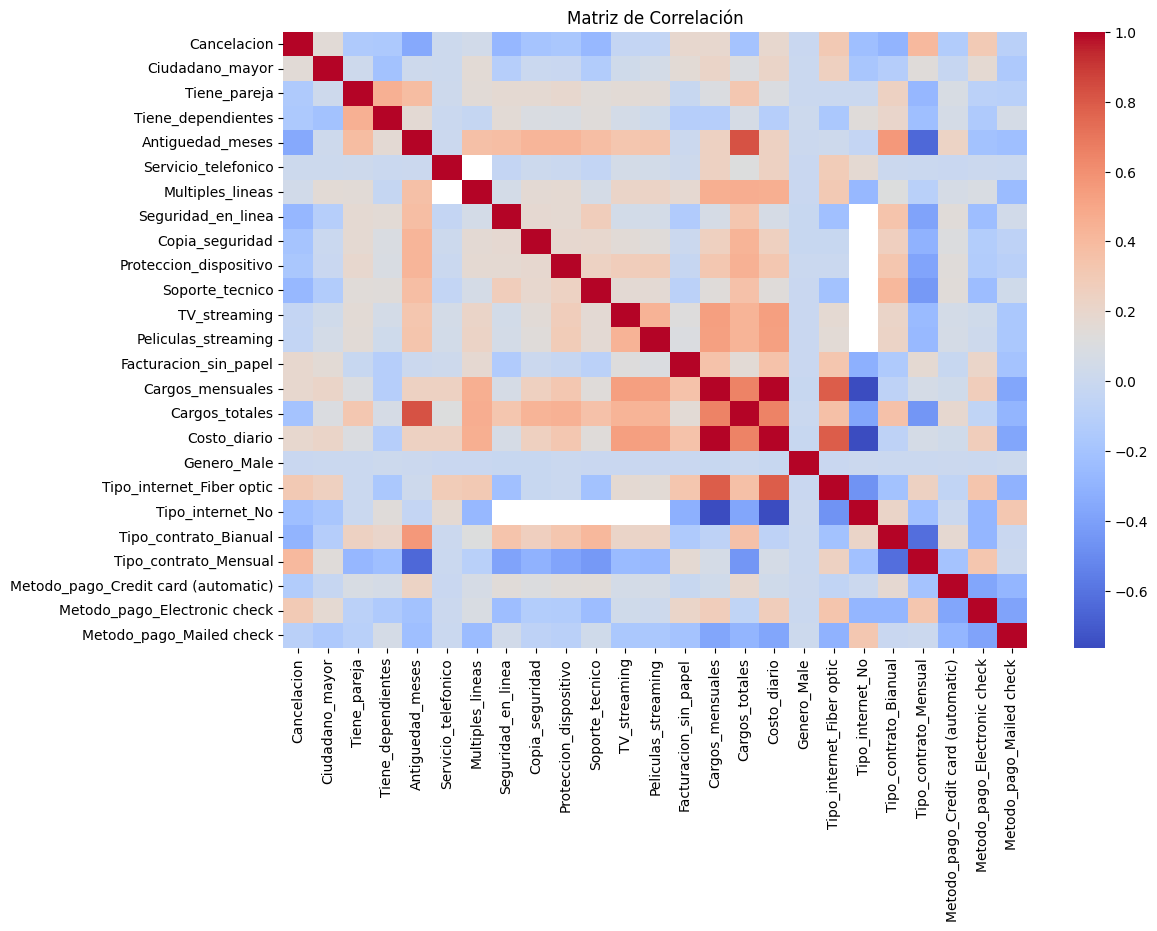

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
corr_churn = corr_matrix["Cancelacion"].sort_values(ascending=False)
corr_churn

,Cancelacion
Cancelacion,1.000000
Tipo_contrato_Mensual,0.404565
Tipo_internet_Fiber optic,0.307463
Metodo_pago_Electronic check,0.301455
Costo_diario,0.192858
Cargos_mensuales,0.192858
Facturacion_sin_papel,0.191454
Ciudadano_mayor,0.150541
Multiples_lineas,0.040207
Servicio_telefonico,0.011691


🔴 Variables con mayor correlación POSITIVA

*   Clientes con mayores cargos mensuales o costo diario tienden más a cancelar.
*   Clientes con facturación sin papel muestran mayor tasa de cancelación.
*   Los adultos mayores presentan una ligera mayor probabilidad de churn.

🔵 Variables con mayor correlación NEGATIVA

*   Antigüedad es la variable más importante: cuanto más tiempo lleva el cliente, menos probabilidad de cancelar.
*   Tener servicios adicionales (seguridad, soporte técnico, backup) reduce significativamente la cancelación
*   Clientes con mayores cargos totales acumulados tienden a quedarse (relacionado con la antigüedad).



# 📊 Análisis Dirigido

### Tiempo de contrato (Antigüedad) × Cancelación

<Figure size 640x480 with 0 Axes>

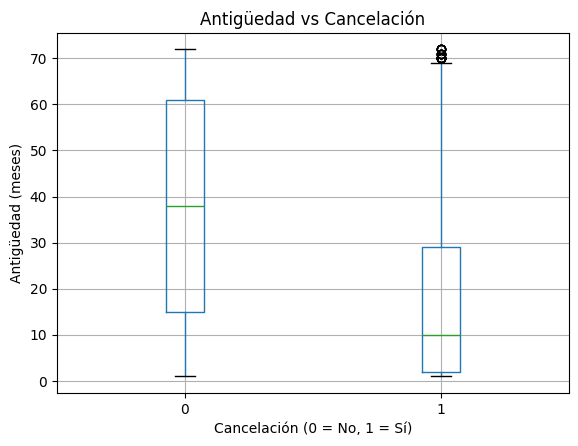

In [ ]:
plt.figure()
df.boxplot(column="Antiguedad_meses", by="Cancelacion")
plt.title("Antigüedad vs Cancelación")
plt.suptitle("")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Antigüedad (meses)")
plt.show()

### Cargos Totales vs Cancelación

<Figure size 640x480 with 0 Axes>

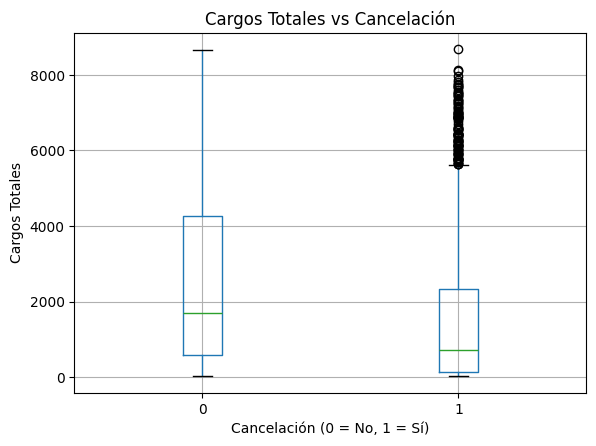

In [ ]:
plt.figure()
df.boxplot(column="Cargos_totales", by="Cancelacion")
plt.title("Cargos Totales vs Cancelación")
plt.suptitle("")
plt.xlabel("Cancelación (0 = No, 1 = Sí)")
plt.ylabel("Cargos Totales")
plt.show()

# 🤖 Modelado Predictivo

### Separación de Datos

In [ ]:
X = df.drop("Cancelacion", axis=1)
y = df["Cancelacion"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Creación de Modelos

In [ ]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())

### Regresión Logística

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)


y_pred_log = log_model.predict(X_test_scaled)


print("Accuracy - Regresión Logística:", accuracy_score(y_test, y_pred_log))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_log))


Accuracy - Regresión Logística: 0.8009950248756219

Matriz de Confusión:
 [[929 104]
 [176 198]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.73      1407
weighted avg       0.79      0.80      0.79      1407



### Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Accuracy - Random Forest:", accuracy_score(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred_rf))


Accuracy - Random Forest: 0.7846481876332623

Matriz de Confusión:
 [[926 107]
 [196 178]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



## Evaluación de los Modelos

In [ ]:
y_pred_log = log_model.predict(X_test_scaled)

print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1-score:", f1_score(y_test, y_pred_log))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))


=== Regresión Logística ===
Accuracy: 0.8009950248756219
Precision: 0.6556291390728477
Recall: 0.5294117647058824
F1-score: 0.5857988165680473
Matriz de Confusión:
 [[929 104]
 [176 198]]


In [ ]:
y_pred_rf = rf_model.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.7846481876332623
Precision: 0.624561403508772
Recall: 0.47593582887700536
F1-score: 0.5402124430955993
Matriz de Confusión:
 [[926 107]
 [196 178]]


In [ ]:
print("Logística - Train:", log_model.score(X_train_scaled, y_train))
print("Logística - Test:", log_model.score(X_test_scaled, y_test))

print("Random Forest - Train:", rf_model.score(X_train, y_train))
print("Random Forest - Test:", rf_model.score(X_test, y_test))


Logística - Train: 0.8074666666666667
Logística - Test: 0.8009950248756219
Random Forest - Train: 0.9976888888888888
Random Forest - Test: 0.7846481876332623


### 📝 Conclusión final

La Regresión Logística mostró un desempeño estable, con valores de exactitud similares en entrenamiento (0.807) y prueba (0.801), lo que indica buena capacidad de generalización y ausencia de overfitting.

En contraste, Random Forest presentó una exactitud muy alta en entrenamiento (0.998) pero considerablemente menor en prueba (0.785), evidenciando un claro caso de overfitting. Esto sugiere que el modelo aprendió patrones específicos del conjunto de entrenamiento, perdiendo capacidad para generalizar a nuevos datos.



🔎 ¿Por qué pasó?

No tiene límite de profundidad

Puede crear árboles muy complejos

Puede memorizar patrones específico

Para mitigar este problema, se podrían ajustar hiperparámetros como la profundidad máxima del árbol (max_depth), el número mínimo de muestras por división (min_samples_split) o el número mínimo de muestras por hoja (min_samples_leaf), reduciendo así la complejidad del modelo.

# 📋 Interpretación y Conclusiones

## Análisis de la Importancia de las Variables

### 1️⃣ Regresión Logística — Análisis de Coeficientes


In [ ]:
coeficientes = pd.DataFrame({
    "Variable": X.columns,
    "Coeficiente": log_model.coef_[0]
})

coeficientes["Impacto_Absoluto"] = np.abs(coeficientes["Coeficiente"])
coeficientes = coeficientes.sort_values(by="Impacto_Absoluto", ascending=False)

print('Coeficiente positivo → aumenta probabilidad de cancelación')

print('Coeficiente negativo → disminuye probabilidad')

coeficientes.head(10)

Coeficiente positivo → aumenta probabilidad de cancelación
Coeficiente negativo → disminuye probabilidad


,Variable,Coeficiente,Impacto_Absoluto
3,Antiguedad_meses,-1.318929,1.318929
14,Cargos_totales,0.617281,0.617281
17,Tipo_internet_Fiber optic,0.615796,0.615796
18,Tipo_internet_No,-0.534702,0.534702
20,Tipo_contrato_Mensual,0.355280,0.355280
15,Costo_diario,-0.302522,0.302522
13,Cargos_mensuales,-0.302522,0.302522
19,Tipo_contrato_Bianual,-0.261198,0.261198
10,TV_streaming,0.228319,0.228319
12,Facturacion_sin_papel,0.181331,0.181331


### 2️⃣ Random Forest — Importancia de Variables

In [ ]:
importances = pd.DataFrame({
    "Variable": X.columns,
    "Importancia": rf_model.feature_importances_
})

importances = importances.sort_values(by="Importancia", ascending=False)

importances.head(10)

,Variable,Importancia
14,Cargos_totales,0.162544
3,Antiguedad_meses,0.142866
15,Costo_diario,0.136598
13,Cargos_mensuales,0.136453
20,Tipo_contrato_Mensual,0.065776
17,Tipo_internet_Fiber optic,0.037689
22,Metodo_pago_Electronic check,0.033180
16,Genero_Male,0.025943
12,Facturacion_sin_papel,0.023247
19,Tipo_contrato_Bianual,0.020794


### 📝 Análisis




En la Regresión Logística, las variables más relevantes fueron aquellas con mayor magnitud en sus coeficientes. Variables como la antigüedad mostraron coeficientes negativos significativos, indicando que a mayor permanencia menor probabilidad de cancelación. Por otro lado, los cargos mensuales presentaron coeficientes positivos, sugiriendo que mayores costos aumentan la probabilidad de churn.

En el modelo Random Forest, la importancia de las variables indicó que la antigüedad y los cargos mensuales son factores determinantes en la predicción. Estas variables contribuyen significativamente a la reducción de impureza en los árboles de decisión.

Ambos modelos coinciden en señalar que la permanencia del cliente y el nivel de gasto son factores clave para explicar la cancelación.

# Conclusión

###**Objetivo del análisis:**

Analizar los factores que influyen en la cancelación de clientes y desarrollar modelos predictivos capaces de anticipar el churn, permitiendo a la empresa implementar estrategias de retención más efectivas.

🔴 **Factores que AUMENTAN la cancelación:**


*   Cargos mensuales / costo del servicio
*   Facturación electrónica
*   Tipo de contrato mensual
*   Clientes adultos mayores

🔵 **Factores que REDUCEN la cancelación:**


*   Antigüedad del cliente (variable más importante)
*   Servicios adicionales (seguridad en línea, soporte técnico)
*   Tener dependientes o pareja
*   Mayor gasto total acumulado








### **Rendimiento de cada modelo**
✅ **Regresión Logística (con normalización)**

Accuracy Train: 0.807

Accuracy Test: 0.801

Buen equilibrio entre precisión y recall

No presentó overfitting

⚠️ **Random Forest (sin normalización)**

Accuracy Train: 0.998

Accuracy Test: 0.785

Evidencia clara de overfitting

###**Principales Factores que Afectan la Cancelación**

*   Baja antigüedad (clientes nuevos)
*   Costos mensuales elevados
*   Falta de servicios complementarios
*   Contratos de corto plazo
*   Menor vinculación con la empresa







### **Estrategias de Retención Propuestas**



🎯 1. **Programa de fidelización para nuevos clientes**

Ofrecer beneficios durante los primeros meses, etapa crítica donde el riesgo de cancelación es mayor.

💰 2. **Revisión de estructura de precios**

Clientes con cargos elevados presentan mayor churn. Se podrían:

Ofrecer descuentos personalizados

Crear planes intermedios

📦 3. **Promoción de servicios adicionales**

Servicios como soporte técnico y seguridad reducen cancelación.
Se recomienda:

Ofrecer paquetes promocionales

Incentivar la contratación de servicios adicionales

📄 4. **Incentivar contratos de mayor duración**

Bonificaciones por contrato anual o bianual podrían reducir el churn.

📊 5. **Sistema de alerta temprana**

Utilizar el modelo predictivo para identificar clientes en riesgo y activar campañas preventivas.

# Conclusión General

El análisis confirma que la cancelación no es aleatoria, sino que está fuertemente influenciada por la antigüedad, el nivel de gasto y el tipo de contrato.

La Regresión Logística demostró ser un modelo sólido y generalizable, mientras que Random Forest requiere ajustes para evitar sobreajuste.

Implementar un sistema predictivo basado en estos hallazgos permitiría a la empresa reducir significativamente la tasa de cancelación mediante intervenciones estratégicas y personalizadas.